In [1]:
import pickle

In [2]:
with open('accs.pkl', 'rb') as f:
    accs = pickle.load(f)

In [3]:
with open('losses.pkl', 'rb') as f:
    losses = pickle.load(f)

In [4]:
with open('iters.pkl', 'rb') as f:
    iters = pickle.load(f)

In [5]:
import numpy as np

In [6]:
data = np.array([iters, losses, accs])

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(data.T, columns=['iter', 'loss', 'accuracy'])

In [17]:
(60000/64)

937.5

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

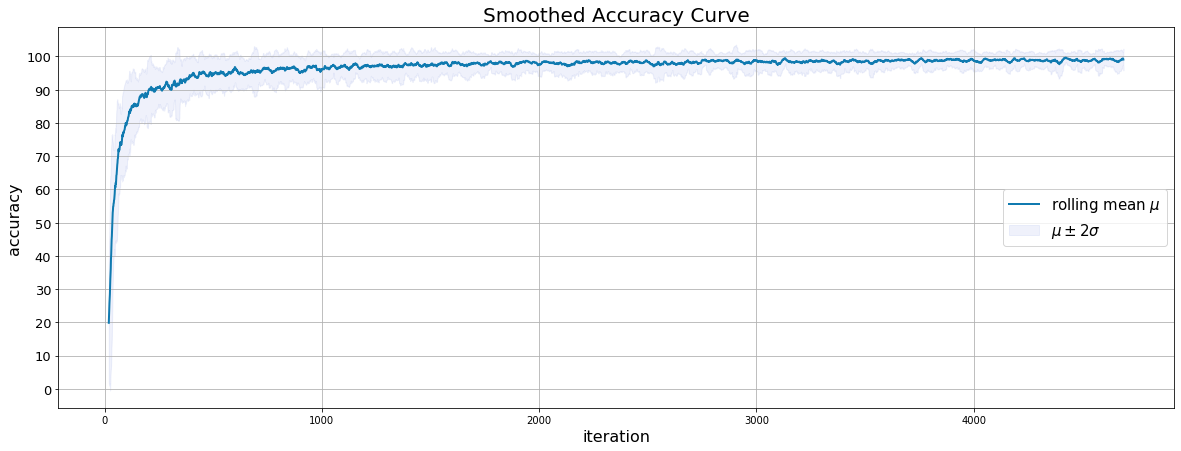

In [11]:
smooth_acc = df['accuracy'].rolling(20)
smooth_acc_mean = smooth_acc.mean()
smooth_acc_std = smooth_acc.std()

plt.figure(figsize=(20, 7))
plt.grid(True)
plt.plot(smooth_acc_mean, linewidth=2, color='#107ab0', label='rolling mean $\mu$')
plt.fill_between(smooth_acc_std.index,
                 smooth_acc_mean - 2 * smooth_acc_std, 
                 smooth_acc_mean + 2 * smooth_acc_std,
                 color = '#2242c7', alpha=.07, label='$\mu \pm 2 \sigma$')

plt.title('Smoothed Accuracy Curve', fontsize=20)
plt.xlabel('iteration', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='right', fontsize=15)

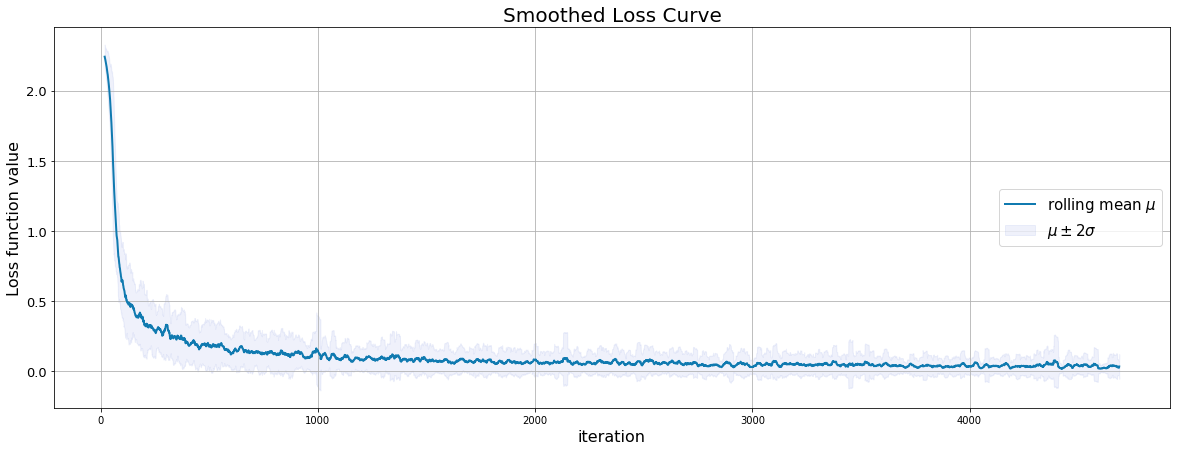

In [12]:
smooth_acc = df['loss'].rolling(20)
smooth_acc_mean = smooth_acc.mean()
smooth_acc_std = smooth_acc.std()

plt.figure(figsize=(20, 7))
plt.grid(True)
plt.plot(smooth_acc_mean, linewidth=2, color='#107ab0', label='rolling mean $\mu$')
plt.fill_between(smooth_acc_std.index,
                 smooth_acc_mean - 2 * smooth_acc_std, 
                 smooth_acc_mean + 2 * smooth_acc_std,
                 color = '#2242c7', alpha=.07, label='$\mu \pm 2 \sigma$')

plt.title('Smoothed Loss Curve', fontsize=20)
plt.xlabel('iteration', fontsize=16)
plt.ylabel('Loss function value', fontsize=16)
plt.yticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='right', fontsize=15)